In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import math

In [3]:
spotify_df = pd.read_csv('./artist_data.csv')
print(len(spotify_df))

9


In [4]:
def drop_specific_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

def results(y, preds):
    print('R² score: \n',r2_score(y,preds))
    print('RSME: \n',math.sqrt(mean_squared_error(y,preds)))
    print('MAE: \n',mean_absolute_error(y,preds))

    '''
    print('Matrix confusion:')
    ConfusionMatrixDisplay.from_predictions( y, preds)
    plt.show()
    print('Classification report: \n',classification_report(y,preds,zero_division=True))
    print('Accuracy score: \n', accuracy_score(y, preds))
    print('Absolute error:\n',mean_absolute_error(y, preds)) '''
    

In [5]:
spotify_df = drop_specific_cols(spotify_df, ['e_grammy', 'e_billboard'])


In [6]:
#variable to predict
y = spotify_df.e_spotify

In [7]:
#features
#we do not consider 'key' based on boxplot observation (title and artist name are not physical variables)
spotify_features = ['duration', 'end_of_fade_in', 'loudness', 'mode','start_of_fade_out', 'tempo', 'time_signature']
X = spotify_df[spotify_features]

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0,test_size=0.25)

In [31]:
forest_model = RandomForestRegressor(random_state=0)
forest_model.fit(train_X, train_y)
rf_spotify_preds = forest_model.predict(val_X)
print(rf_spotify_preds)

[1. 1. 1.]


In [29]:
results(val_y, rf_spotify_preds)

R² score: 
 1.0
RSME: 
 0.0
MAE: 
 0.0


In [55]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [11]:
svr_model = SVR(kernel='rbf')
svr_model.fit(train_X, train_y)
svr_spotify_preds = svr_model.predict(val_X)

In [12]:
results(val_y, svr_spotify_preds)

R² score: 
 1.0
RSME: 
 0.0
MAE: 
 0.0


In [58]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [15]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_X, train_y)
knn_spotify_preds = knn_model.predict(val_X)

In [16]:
results(val_y, knn_spotify_preds)

R² score: 
 1.0
RSME: 
 0.0
MAE: 
 0.0


In [61]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0, test_size=0.25)
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [17]:
logistic_model = LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto')
logistic_model.fit(train_X, train_y)
logistic_spotify_preds = logistic_model.predict(val_X)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Matrix confusion:


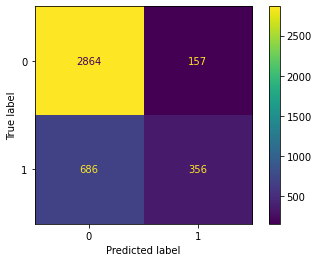

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      3021
           1       0.69      0.34      0.46      1042

    accuracy                           0.79      4063
   macro avg       0.75      0.64      0.66      4063
weighted avg       0.78      0.79      0.77      4063

Accuracy score: 
 0.7925178439576668
Absolute error:
 0.20748215604233325


In [63]:
results(val_y, logistic_spotify_preds)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=5000000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(30, 30, 30, 30), max_iter=5000000)

Matrix confusion:


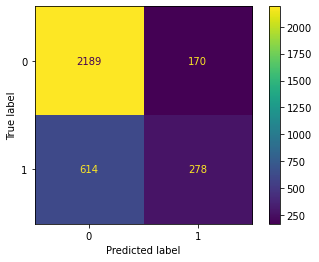

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85      2359
           1       0.62      0.31      0.41       892

    accuracy                           0.76      3251
   macro avg       0.70      0.62      0.63      3251
weighted avg       0.74      0.76      0.73      3251

Accuracy score: 
 0.7588434327899108
Absolute error:
 0.2411565672100892


In [67]:
predictions = mlp.predict(X_test)
results(y_test, predictions)